# CMPUT 466/566, Winter 2020 Introduction to Machine learning 
## Coding Assignment 2 
### Problem 1 Report
By Nathan Klapstein #1449872

In [1]:

import struct

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.special import expit


In [2]:

def readMNISTdata():
    with open('data/t10k-images-idx3-ubyte', 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        test_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        test_data = test_data.reshape((size, nrows * ncols))

    with open('data/t10k-labels-idx1-ubyte', 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        test_labels = np.fromfile(f,
                                  dtype=np.dtype(np.uint8).newbyteorder('>'))
        test_labels = test_labels.reshape((size, 1))

    with open('data/train-images-idx3-ubyte', 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        train_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        train_data = train_data.reshape((size, nrows * ncols))

    with open('data/train-labels-idx1-ubyte', 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        train_labels = np.fromfile(f,
                                   dtype=np.dtype(np.uint8).newbyteorder('>'))
        train_labels = train_labels.reshape((size, 1))

    # augmenting a constant feature of 1 (absorbing the bias term)
    train_data = np.concatenate(
        (np.ones([train_data.shape[0], 1]), train_data), axis=1)
    test_data = np.concatenate((np.ones([test_data.shape[0], 1]), test_data),
                               axis=1)
    np.random.seed(314)
    np.random.shuffle(train_labels)
    np.random.seed(314)
    np.random.shuffle(train_data)

    X_train = train_data[:50000] / 256
    t_train = train_labels[:50000]

    X_val = train_data[50000:] / 256
    t_val = train_labels[50000:]

    return X_train, t_train, X_val, t_val, test_data, test_labels


In [3]:
 X_train, t_train, X_val, t_val, X_test, t_test = readMNISTdata()

In [4]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition  # The broadcast mechanism is applied here

def cross_entropy(y_hat, y):
    print(range(len(y_hat)), y)
    sum = 0
    return - np.log(y_hat[list(range(len(y_hat))), y])


def predict(X, W, t=None):
    # X_new: Nsample x (d+1)
    # W: (d+1) x K

    # TODO: Your code here
#     print(X, "w" W, t)
    
    # TODO: recycled code
#     y_hat = np.matmul(X, W)
#     loss = (1 / 2) * np.average(np.square(y_hat - y))
#     risk = np.average(np.abs(y_hat - y))

    y = np.matmul(X, W)
    # print(y)
    t_hat = np.argmax(y, axis=0)
    
    #loss = (1 / 2) * np.average(np.square(t_hat - t))
    
    # Calculation of loss
    z = np.matmul(X, W)
    z -= np.max(z, axis=0)  # Max trick for the softmax, preventing infinite values
    p = np.exp(z) / np.sum(np.exp(z), axis=0)  # Softmax function
    # L = -1 / len(y) * np.sum(np.log(p[y, range(len(y))]))  # Cross-entropy loss
    import sys
    
    # L = -1 / len(y) * np.sum(np.log(p[y, np.arange(0, X.shape[1])]))  # Cross-entropy loss
    L = - 1 / len(y) * np.sum(np.multiply(y, np.log(p))) # Cross-entropy loss
    R = 0.5 * np.sum(np.multiply(W, W))  # Regularization term
    loss = L + R  # Total loss
    
    risk = np.average(np.abs(t_hat - t))
    # TODO: check if risk = acc
    acc = risk
    
    return y, t_hat, loss, acc


In [5]:

def gradient(X, w, y=None):
    # TODO: FIXED:  Did not scale gradient by 1/M;
    # TODO: CHECK: 1/M  this is 1/N_train or should be 1/X.shape[0]=1/batch_size
    return (1/X.shape[0])*np.matmul(np.transpose(X), (np.matmul(X, w) - y))


In [6]:
N_class = 10

alpha = 0.1  # learning rate
batch_size = 100  # batch size
MaxIter = 50  # Maximum iteration
decay = 0.  # weight decay

In [7]:
# TODO: recycled code
def train(X_train, y_train, X_val, y_val):
    N_train = X_train.shape[0]
    N_val = X_val.shape[0]

    # initialization
    w = np.zeros([X_train.shape[1], 1])
    # w: (d+1)x1

    losses_train = []
    risks_val = []

    w_best = None
    risk_best = 10000
    epoch_best = 0

    for epoch in range(MaxIter):
        loss_this_epoch = 0
        for b in range(int(np.ceil(N_train / batch_size))):
            X_batch = X_train[b * batch_size: (b + 1) * batch_size]
            y_batch = y_train[b * batch_size: (b + 1) * batch_size]
    
            y_hat_batch, t_hat, loss_batch, risk = predict(X_batch, w, y_batch)
            loss_this_epoch += loss_batch

            # TODO: Your code here
            # Mini-batch gradient descent
            
            # TODO: FIXED: Did not scale gradient by 1/M;
            # TODO: CHECK: see gradient TODOs
            w = w - alpha * gradient(X_batch, w, y_batch)
            # w = w - alpha * (1/batch_size)*gradient(X_batch, w, y_batch)
        # TODO: Your code here
        # monitor model behavior after each epoch
        
        # 1. Compute the training loss by averaging loss_this_epoch
        #         losses_train.append(loss_this_epoch/int(np.ceil(N_train/batch_size)))
        losses_train.append(loss_this_epoch / (int(np.ceil(N_train / batch_size))))
        #print(f"epoch={epoch} training loss={loss_this_epoch/  (int(np.ceil(N_train/batch_size)))}")

        # 2. Perform validation on the validation test by the risk
        # TODO: FIXED: Validation set should not be run in batches
        _, t_hat, _, risk = predict(X_val, w, y_val)
        risks_val.append(risk)
        
        # 3. Keep track of the best validation epoch, risk, and the weights
        if risks_val[epoch] <= risk_best:
            epoch_best = epoch
            risk_best = risks_val[epoch]
            w_best = w

    # Return some variables as needed
    return epoch_best, risk_best, w_best, losses_train,  risks_val, risk_best





In [8]:


def softmax_loss_vectorized(W, X, y, reg):
  """
  Softmax loss function, vectorized version.
  Inputs:
  - W: C x D array of weights
  - X: D x N array of data. Data are D-dimensional columns
  - y: 1-dimensional array of length N with labels 0...K-1, for K classes
  - reg: (float) regularization strength
  Returns:
  a tuple of:
  - loss as single float
  - gradient with respect to weights W, an array of same size as W
  """
  # Initialize the loss and gradient to zero.
  loss = 0.0
  dW = np.zeros_like(W)
  N = X.shape[1] 
  # Compute cross-entropy loss
  z = np.dot(W, X)
  exp_z = np.exp(z - np.max(z, axis = 0) + np.min(z, axis =0)) # for numerical stability
  p = exp_z / np.sum(exp_z, axis = 0) # softmax 
  R = np.sum(W*W) # regularization

  dR = 2*W
  loss = - np.sum(np.log(p[y, np.arange(0, N)]))/ N + reg * R 
  
  p[y, np.arange(0, N)] -= 1
  dW = np.dot(p, X.T)

  dW = dW/N + reg * dR


  return loss, dW


class LinearClassifier:

  def __init__(self):
    self.W = None

  def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
    """
    Train this linear classifier using stochastic gradient descent.
    Inputs:
    - X: D x N array of training data. Each training point is a D-dimensional
         column.
    - y: 1-dimensional array of length N with labels 0...K-1, for K classes.
    - learning_rate: (float) learning rate for optimization.
    - reg: (float) regularization strength.
    - num_iters: (integer) number of steps to take when optimizing
    - batch_size: (integer) number of training examples to use at each step.
    - verbose: (boolean) If true, print progress during optimization.
    Outputs:
    A list containing the value of the loss function at each training iteration.
    """
    
    print(X.dtype)
    dim, num_train = X.shape
    num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
    if self.W is None:
      # lazily initialize W
      self.W = np.random.randn(num_classes, dim) * 0.001

    # Run stochastic gradient descent to optimize W
    loss_history = []
    for it in range(num_iters):

      idx = np.random.choice(np.arange(0, X.shape[1]), batch_size, replace = True)
      X_batch = X[:, idx]
      y_batch = y[idx]
      
      assert X_batch.shape == (X.shape[0], batch_size)
      assert y_batch.shape == (batch_size,1)

      # evaluate loss and gradient
      loss, grad = self.loss(X_batch, y_batch, reg)
      
      loss_history.append(loss)
      # perform parameter update
      #########################################################################
      self.W = self.W - learning_rate * grad


      if verbose and it % 100 == 0:
        print('iteration %d / %d: loss %f' % (it, num_iters, loss))

    return loss_history

  def predict(self, X):
    """
    Use the trained weights of this linear classifier to predict labels for
    data points.
    Inputs:
    - X: D x N array of training data. Each column is a D-dimensional point.
    Returns:
    - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
      array of length N, and each element is an integer giving the predicted
      class.
    """
    z = np.dot(self.W, X)
    exp_z = np.exp(z - np.max(z, axis = 0) + np.min(z, axis =0)) # for numerical stability
    p = exp_z / np.sum(exp_z, axis = 0) # softmax (could be in vectorize)
    y_pred = np.argmax(p, axis = 0)
    
    return y_pred

  def loss(self, X_batch, y_batch, reg):
    """
    Compute the loss function and its derivative.
    Subclasses will override this.
    Inputs:
    - X_batch: D x N array of data; each column is a data point.
    - y_batch: 1-dimensional array of length N with labels 0...K-1, for K classes.
    - reg: (float) regularization strength.
    Returns: A tuple containing:
    - loss as a single float
    - gradient with respect to self.W; an array of the same shape as W
    """
    pass


class Softmax(LinearClassifier):
  """ A subclass that uses the Softmax + Cross-entropy loss function """

  def loss(self, X_batch, y_batch, reg):
    return softmax_loss_vectorized(self.W, X_batch, y_batch, reg)
  

(50000, 785) (50000, 1) (10000, 785) (10000, 1) (10000, 785) (10000, 1)
float64
iteration 0 / 50: loss 230.447643


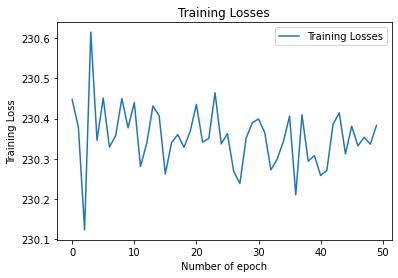

In [9]:
X_train, t_train, X_val, t_val, X_test, t_test = readMNISTdata()

print(X_train.shape, t_train.shape, X_val.shape, t_val.shape, X_test.shape,
  t_test.shape)

sm = Softmax()

loss_history = sm.train(X=X_train, y=t_train, num_iters=MaxIter, verbose=True, batch_size=batch_size)



fig = plt.figure()
plt.plot(loss_history, label="Training Losses")
plt.title("Training Losses")
plt.legend()
plt.xlabel('Number of epoch')
plt.ylabel('Training Loss')
plt.show()

In [10]:
epoch_best, acc_best, W_best, losses_train, risks_val, risk_best = train(X_train, t_train, X_val, t_val)
acc_train = risk_best

c:\users\nathan\pycharmprojects\cmput_466_coding_assignment_2\.venv\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
c:\users\nathan\pycharmprojects\cmput_466_coding_assignment_2\.venv\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
c:\users\nathan\pycharmprojects\cmput_466_coding_assignment_2\.venv\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\nathan\pycharmprojects\cmput_466_coding_assignment_2\.venv\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
c:\users\nathan\pycharmprojects\cmput_466_coding_assignment_2\.venv\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in multiply
c:\users\nathan\pycharmprojects\cmput_466_coding_assignment_2\.venv\lib\site-packages\ipykernel_launcher.py:24:

In [11]:
print(f"The best epoch: {epoch_best:d}")
print(f"The best risk (normalized) {risk_best:10.10f}")

The best epoch: 49
The best risk (normalized) 4.4266000000


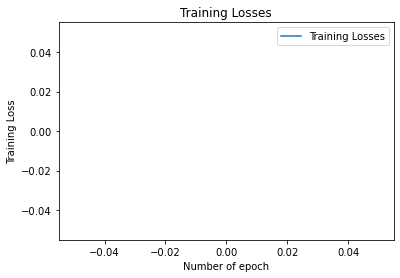

In [12]:
fig = plt.figure()
plt.plot(losses_train, label="Training Losses")
plt.title("Training Losses")
plt.legend()
plt.xlabel('Number of epoch')
plt.ylabel('Training Loss')
plt.show()


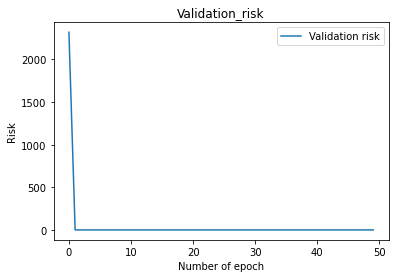

In [13]:

fig = plt.figure()
plt.plot(np.array(risks_val), label='Validation risk')
plt.title("Validation_risk")
plt.xlabel('Number of epoch')
plt.ylabel('Risk')
plt.legend()
plt.show()


In [14]:
_, _, _, acc_test = predict(X_test, W_best, t_test)

print('At epoch', epoch_best, 'val: ', acc_best, 'test:', acc_test, 'train:', acc_train)


At epoch 49 val:  4.4266 test: 4.4434 train: 4.4266


In [15]:
class Softmax:
    """
    A softmax classifier
    """
    __slots__ = ("epochs", "learningRate", "batchSize", "regStrength", "wt", "momentum", "velocity")
    def __init__(self, epochs, learningRate, batchSize, regStrength, momentum):
        """
        Softmax constructor which initialized parameters
        :param epochs: Number of iterations over complete training data
        :param learningRate: A step size or a learning rate
        :param batchSize: A mini-batch size(less than total number of training data)
        :param regStrength: A regularization strength
        :param momentum: A momentum value
        """
        self.epochs = epochs
        self.learningRate = learningRate
        self.batchSize = batchSize
        self.regStrength = regStrength
        self.momentum = momentum
        self.velocity = None
        self.wt = None

    def train(self, xTrain, yTrain, xTest, yTest):
        """
        Train a softmax classifier model on training data using stochastic gradient descent with mini-batches
        and momentum to minimize softmax (cross-entropy) loss of this single layer neural network. It calcualtes
        mean per-class accuracy for the training/testing data and the loss.
        :param xTrain: Training input data
        :param yTrain: Training labels
        :param xTest: Testing input data
        :param yTest: Testing labels
        :return: A tuple of training/Testing losses and Accuracy
        """
        D = xTrain.shape[1]  # dimensionality
        label = np.unique(yTrain)
        numOfClasses = len(label) # number of classes
        yTrainEnc = self.oneHotEncoding(yTrain, numOfClasses)
        yTestEnc = self.oneHotEncoding(yTest, numOfClasses)
        self.wt = 0.001 * np.random.rand(D, numOfClasses)
        self.velocity = np.zeros(self.wt.shape)
        trainLosses = []
        testLosses = []
        trainAcc = []
        testAcc = []
        for e in range(self.epochs): # loop over epochs
            trainLoss = self.SGDWithMomentum(xTrain, yTrainEnc)
            testLoss, dw = self.computeLoss(xTest, yTestEnc)
            trainAcc.append(self.meanAccuracy(xTrain, yTrain))
            testAcc.append(self.meanAccuracy(xTest, yTest))
            trainLosses.append(trainLoss)
            testLosses.append(testLoss)
            print("{:d}\t->\tTrainL : {:.7f}\t|\tTestL : {:.7f}\t|\tTrainAcc : {:.7f}\t|\tTestAcc: {:.7f}"
                  .format(e, trainLoss, testLoss, trainAcc[-1], testAcc[-1]))
        return trainLosses, testLosses, trainAcc, testAcc

    def SGDWithMomentum(self, x, y):
        """
        Stochastic gradient descent with mini-batches. It divides training data into mini-batches
        and compute loss and grad on that mini-batches and updates the weights. It repeats for all samples.
        :param x: An input samples
        :param y: An input labels
        :return: Total loss computed
        """
        losses = []
        # Randomly juggle up the data.
        import random
        randomIndices = random.sample(range(x.shape[0]), x.shape[0])
        x = x[randomIndices]
        y = y[randomIndices]
        for i in range(0, x.shape[0], self.batchSize):
            Xbatch = x[i:i+self.batchSize]
            ybatch = y[i:i+self.batchSize]
            loss, dw = self.computeLoss(Xbatch, ybatch)
            self.velocity = (self.momentum * self.velocity) + (self.learningRate * dw)
            self.wt -= self.velocity
            losses.append(loss)
        return np.sum(losses) / len(losses)

    def softmaxEquation(self, scores):
        """
        It calculates a softmax probability
        :param scores: A matrix(wt * input sample)
        :return: softmax probability
        """
        scores -= np.max(scores)
        prob = (np.exp(scores).T / np.sum(np.exp(scores), axis=1)).T
        return prob

    def computeLoss(self, x, yMatrix):
        """
        It calculates a cross-entropy loss with regularization loss and gradient to update the weights.
        :param x: An input sample
        :param yMatrix: Label as one-hot encoding
        :return:
        """
        numOfSamples = x.shape[0]
        scores = np.dot(x, self.wt)
        prob = self.softmaxEquation(scores)

        loss = -np.log(np.max(prob)) * yMatrix
        regLoss = (1/2)*self.regStrength*np.sum(self.wt*self.wt)
        totalLoss = (np.sum(loss) / numOfSamples) + regLoss
        grad = ((-1 / numOfSamples) * np.dot(x.T, (yMatrix - prob))) + (self.regStrength * self.wt)
        return totalLoss, grad

    def meanAccuracy(self, x, y):
        """
        It calculates mean-per class accuracy
        :param x: Input sample
        :param y: label sample
        :return: mean-per class accuracy
        """
        predY = self.predict(x)
        predY = predY.reshape((-1, 1))  # convert to column vector
        return np.mean(np.equal(y, predY))

    def predict(self, x):
        """
        It predict the label based on input sample and a model
        :param x: Input sample
        :return: predicted label
        """
        return np.argmax(x.dot(self.wt), 1)

    def oneHotEncoding(self, y, numOfClasses):
        """
        Convert a vector into one-hot encoding matrix where that particular column value is 1 and rest 0 for that row.
        :param y: Label vector
        :param numOfClasses: Number of unique labels
        :return: one-hot encoding matrix
        """
        y = np.asarray(y, dtype='int32')
        if len(y) > 1:
            y = y.reshape(-1)
        if not numOfClasses:
            numOfClasses = np.max(y) + 1
        yMatrix = np.zeros((len(y), numOfClasses))
        yMatrix[np.arange(len(y)), y] = 1
        return yMatrix


def plotGraph(trainLosses, testLosses, trainAcc, testAcc):
    """
    Plot a Epochs vs. Cross Entropy Loss graph
    :param trainLosses: List of training loss over every epochs
    :param testLosses: List of testing loss over every epochs
    :param trainAcc: List of training accuracy over every epochs
    :param testAcc: List of testing accuracy over every epochs
    :return: None
    """
    plt.subplot(1, 2, 1)
    plt.plot(trainLosses, label="Train loss")
    plt.plot(testLosses, label="Test loss")
    plt.legend(loc='best')
    plt.title("Epochs vs. Cross Entropy Loss")
    plt.xlabel("Number of Iteration or Epochs")
    plt.ylabel("Cross Entropy Loss")

    plt.subplot(1, 2, 2)
    plt.plot(trainAcc, label="Train Accuracy")
    plt.plot(testAcc, label="Test Accuracy")
    plt.legend(loc='best')
    plt.title("Epochs vs. Mean per class Accuracy")
    plt.xlabel("Number of Iteration or Epochs")
    plt.ylabel("Mean per class Accuracy")
    plt.show()

def readData(filename):
    """
    Read data from file and divide into input sample and a label.
    :param filename: name of a file
    :return: input sample and label
    """
    dataMatrix = np.loadtxt(filename)
    np.random.shuffle(dataMatrix)
    X = dataMatrix[:, 1:]
    y = dataMatrix[:, 0].astype(int)
    y = y.reshape((-1, 1))
    y -= 1
    return X, y

def makeMeshGrid(x, y, h=0.02):
    """
    Create a mesh point to plot decision boundary.
    :param x: data or sample (for x-axis on meshgrid)
    :param y: label(for y-axis on meshgrid)
    :param h: step size for meshgrid
    :return: matrix of x-axis and y-axis
    """
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plotContours(plt, model, xx, yy, **params):
    """
    It plot a contour.
    :param plt: A matplotlib.pyplot object
    :param model: softmax classifier model
    :param xx: meshgrid ndarray
    :param yy: meshgrid ndarray
    :param params: Number of parameters to pass to contour function
    :return:
    """
    arr = np.array([xx.ravel(), yy.ravel()])
    scores = np.dot(arr.T, sm.wt)
    prob = model.softmaxEquation(scores)
    Z = np.argmax(prob, axis=1) + 1

    # Put result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, **params)
    # plt.axis('off')

def plotDecisionBoundary(x, y):
    """
    Plot a decision boundary to display a sample with region
    :param x: input data or sample
    :param y: label
    :return: None
    """
    markers = ('+', '.', 'x')
    colors = ('blue', 'dimgrey', 'maroon')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    xx, yy = makeMeshGrid(x, y)
    plotContours(plt, sm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot also the training points
    for idx, cl in enumerate(np.unique(y)):
        xBasedOnLabel = x[np.where(y[:,0] == cl)]
        plt.scatter(x=xBasedOnLabel[:, 0], y=xBasedOnLabel[:, 1], c=cmap(idx),
                    cmap=plt.cm.coolwarm, marker=markers[idx], label=cl)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.title("Softmax Classifier on Iris Dataset(Decision Boundary)")
    plt.xticks()
    plt.yticks()
    plt.legend(loc='upper left')
    plt.show()


0	->	TrainL : 0.0442766	|	TestL : 0.0204028	|	TrainAcc : 0.8971000	|	TestAcc: 0.8945000
1	->	TrainL : 0.0251104	|	TestL : 0.0280077	|	TrainAcc : 0.9040400	|	TestAcc: 0.9004000
2	->	TrainL : 0.0308830	|	TestL : 0.0329496	|	TrainAcc : 0.9072000	|	TestAcc: 0.9046000
3	->	TrainL : 0.0351204	|	TestL : 0.0364781	|	TrainAcc : 0.9133000	|	TestAcc: 0.9079000
4	->	TrainL : 0.0381186	|	TestL : 0.0392389	|	TrainAcc : 0.9140000	|	TestAcc: 0.9098000
5	->	TrainL : 0.0405898	|	TestL : 0.0412856	|	TrainAcc : 0.9146800	|	TestAcc: 0.9092000
6	->	TrainL : 0.0424312	|	TestL : 0.0430422	|	TrainAcc : 0.9157600	|	TestAcc: 0.9108000
7	->	TrainL : 0.0440418	|	TestL : 0.0445630	|	TrainAcc : 0.9170600	|	TestAcc: 0.9114000
8	->	TrainL : 0.0453599	|	TestL : 0.0457752	|	TrainAcc : 0.9186200	|	TestAcc: 0.9114000
9	->	TrainL : 0.0464580	|	TestL : 0.0468354	|	TrainAcc : 0.9177400	|	TestAcc: 0.9115000
10	->	TrainL : 0.0474662	|	TestL : 0.0476723	|	TrainAcc : 0.9184400	|	TestAcc: 0.9112000
11	->	TrainL : 0.0482506	|	Test

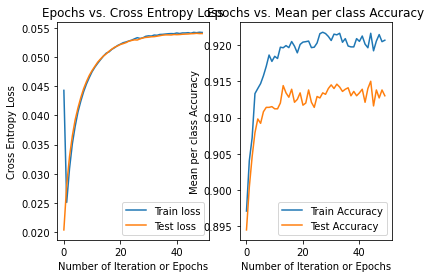

c:\users\nathan\pycharmprojects\cmput_466_coding_assignment_2\.venv\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide


(nan,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]))

In [16]:
learningRate = 0.07
regStrength = 0.001

momentum= 0.5




X_train, t_train, X_val, t_val, X_test, t_test = readMNISTdata()


sm = Softmax(epochs=MaxIter, learningRate=learningRate, batchSize=batch_size,
             regStrength=regStrength, momentum=momentum)
trainLosses, testLosses, trainAcc, testAcc = sm.train(X_train, t_train, X_val, t_val) # Train a network
plotGraph(trainLosses, testLosses, trainAcc, testAcc)

In [19]:
sm.computeLoss(X_test, sm.oneHotEncoding(t_test, 10))

c:\users\nathan\pycharmprojects\cmput_466_coding_assignment_2\.venv\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide


(nan,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]))

In [ ]:
# plotDecisionBoundary(X_train, t_train)

In [ ]:
# plotDecisionBoundary(X_val, t_val)